## Scope
- See https://docs.julialang.org/en/v1/manual/variables-and-scoping/
- structrures with the `struct` keyword
- modules with the `module` keyword

In [1]:
data = [1, 2, 3]
s = 0
beta, gamma = 2, 1

for i in 1:length(data)
    print(i, " ")
    global s
    s += beta * data[i]
end

println("\nSum of data in external scope is $s")

1 2 3 
Sum of data in external scope is 12


In [2]:
# bubble sort
function bubbleSort!(a)
    n = length(a)
    for i in 1:n-1
        for j in 1:n-i
            if a[j] > a[j+1]
                a[j], a[j+1] = a[j+1], a[j]
            end
        end
    end
    return a
end

bubbleSort! (generic function with 1 method)

In [3]:
a = [3, 2, 1]
bubbleSort!(a)

3-element Vector{Int64}:
 1
 2
 3

### Roots of a polynomial

Consider the polynomial $f(x) = a_nx^n + a_n-1x^n-1 + ... + a_1x + a_0$

In [4]:
using Roots

In [5]:
# The .. is a splat operator
# This means that the function arguments are variadic
# Simplest example of a variadic function is print, since it takes arbitrary number arguments separated by a comma
function polynomialGenerator(a...)
    n = length(a) - 1
    poly = function(x) 
        return sum(a[i+1] * x^i for i in 0:n)
    end
    return poly
end
    

polynomialGenerator (generic function with 1 method)

In [6]:
polynomial = polynomialGenerator(1, 3, -10)
zeroVals = find_zeros(polynomial, -10, 10)
println("Zeros are $zeroVals")

Zeros are [-0.19999999999999998, 0.5]


## Steady State of a Markov Chain
- Consider a theoretical city with 3 states: 1) file, 2) cloudy, and 3) rainy.
- On each day, given a certain state, there is a probability distribution of the weather state for the next day
- This simple model makes a discrete-time (jhomogeneous) markov chain.
- Described by the 3x3 transtion probability matrix $P$ where $P_{ij}$ indicates the probability of transitioning to state $j$ given the current state $i$.
- Stationary distribution is $\pi = [\pi_1, \pi_2, \pi_3]$
- 4 differet approaches we can use to find the stationary distribution:
    1. By raising $P$ to a higher power, the limiting distribution is obtained in any row.
    
    $\pi_i = \lim_{x\to\infty} [P^n]_{j,i}$ for any index $j$
    
    2. Wwe solve the overdetermined linear system of equations:
    
    $\pi P = \pi$ and $\sum_{i=1}^{3} \pi_i = 1$
    
    3. Use the Perron Frobenius theorum, we find an eigenvector (of maximal magnitude 1 proportional to $\pi$ and normalize it by the sum of probabilities (L1 Norm)
    
    4. We run a Monte Carlo siumulation generating random values of weather according to $P$, then take the long term proportions of each state.

In [7]:
using LinearAlgebra, StatsBase

In [8]:
# Setup the transition probability matrix
P = [.5 .4 .1;
    .3 .2 .5;
    .5 .3 .2]

3×3 Matrix{Float64}:
 0.5  0.4  0.1
 0.3  0.2  0.5
 0.5  0.3  0.2

In [9]:
# first way to compute the steady state
piProb1 = (P^100)[1,:]

3-element Vector{Float64}:
 0.43750000000000056
 0.31250000000000044
 0.25000000000000033

In [10]:
# Second way
A = vcat((P' - I)[1:2,:],ones(3)')
b = [0 0 1]'
piProb2 = A \ b

3×1 Matrix{Float64}:
 0.43750000000000006
 0.31249999999999994
 0.25

In [11]:
# Third way
eigVecs = eigvecs(copy(P'))
highestVec = eigVecs[:,findmax(abs.(eigvals(P)))[2]]
piProb3 = Array{Float64}(highestVec) / norm(highestVec, 1)


3-element Vector{Float64}:
 0.43749999999999994
 0.31250000000000006
 0.25

In [12]:
# Fourth way (no linear algebra, only simulations)
numInState = zeros(Int, 3)
state = 1
N = 10^6
for t in 1:N
    numInState[state] += 1
    global state = sample(1:3, weights(P[state,:]))
end
piProb4 = numInState/N

3-element Vector{Float64}:
 0.437726
 0.312397
 0.249877

## Web Inbterfacing, JSON, and String Processing

In [13]:
using HTTP, JSON

In [14]:
url = "https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt"
data = HTTP.request("GET", url)

HTTP.Messages.Response:
"""
HTTP/1.1 200 OK
Connection: keep-alive
Content-Length: 5458199
Last-Modified: Thu, 23 Apr 2020 18:02:39 GMT
ETag: "d2028225a89d8b0b3093dddb720da91f"
x-amz-version-id: null
Content-Type: text/plain
Accept-Ranges: bytes
Age: 3161
Date: Fri, 26 Nov 2021 22:37:13 GMT
X-Served-By: cache-bwi5156-BWI, cache-dfw18627-DFW
X-Cache: HIT, HIT
X-Cache-Hits: 0, 0
Vary: Accept-Encoding
Strict-Transport-Security: max-age=31557600

This is the 100th Etext file presented by Project Gutenberg, and
is presented in cooperation with World Library, Inc., from their
Library of the Future and Shakespeare CDROMS.  Project Gutenberg
often releases Etexts that are NOT placed in the Public Domain!!

Shakespeare

*This Etext has certain copyright implications you should read!*

<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM
SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS
PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE
WITH PERMISSION.  EL

In [15]:
shakespeare = String(data.body)
shakespeareWords = split(shakespeare)

901325-element Vector{SubString{String}}:
 "This"
 "is"
 "the"
 "100th"
 "Etext"
 "file"
 "presented"
 "by"
 "Project"
 "Gutenberg,"
 "and"
 "is"
 "presented"
 ⋮
 "MEMBERSHIP.>>"
 "End"
 "of"
 "this"
 "Etext"
 "of"
 "The"
 "Complete"
 "Works"
 "of"
 "William"
 "Shakespeare"

In [16]:
url = "https://raw.githubusercontent.com/h-Klok/StatsWithJuliaBook/master/data/jsonCode.json"
jsonWords = HTTP.request("GET", url)
parsedJsonDict = JSON.parse(String(jsonWords.body))

Dict{String, Any} with 2 entries:
  "numToShow" => 5
  "words"     => Any["heaven", "hell", "man", "woman", "boy", "girl", "king", "…

In [17]:
parsedJsonDict["words"]

16-element Vector{Any}:
 "heaven"
 "hell"
 "man"
 "woman"
 "boy"
 "girl"
 "king"
 "queen"
 "prince"
 "sir"
 "love"
 "hate"
 "knife"
 "english"
 "england"
 "god"

In [18]:
keywords = Array{String}(parsedJsonDict["words"])
numbertoShow = parsedJsonDict["numToShow"]
wordCount = Dict([(x, count(w -> lowercase(w) == lowercase(x), shakespeareWords)) for x in keywords])
sortedWordCount = sort(collect(wordCount), by=last, rev=true)
display(sortedWordCount[1:numbertoShow])

5-element Vector{Pair{String, Int64}}:
 "king" => 1698
 "love" => 1279
  "man" => 1033
  "sir" => 721
  "god" => 555

In [19]:
using Plots

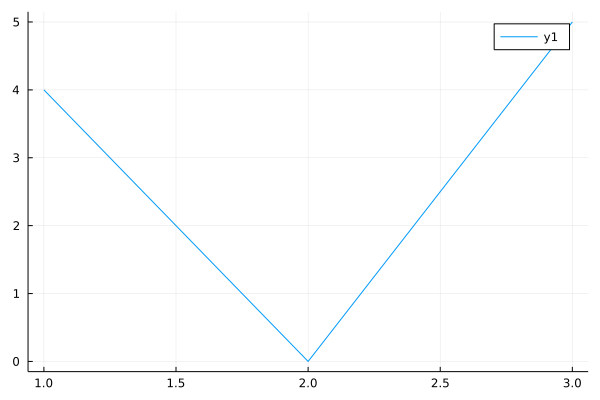

In [20]:
a = [1, 2, 3]
b = [4, 0, 5]
plot(a, b)

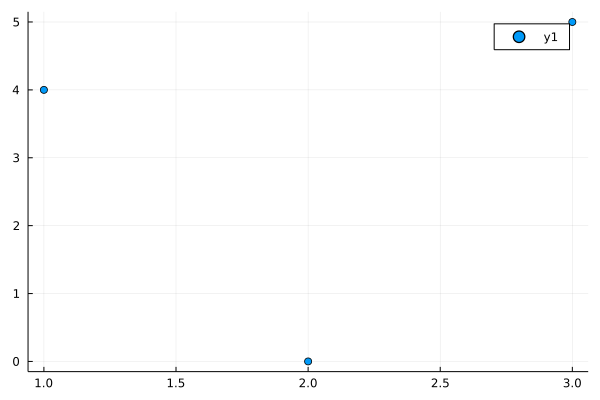

In [21]:
scatter(a, b)

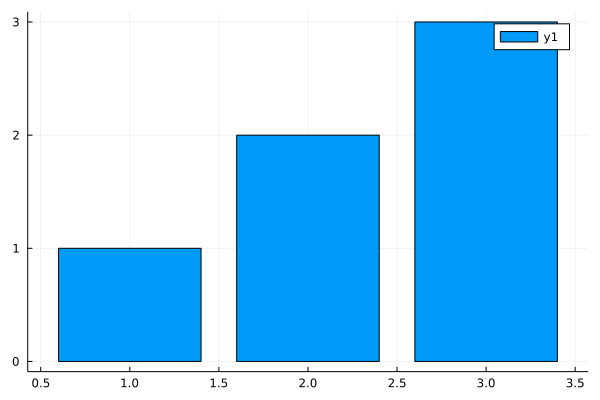

In [22]:
bar(a)

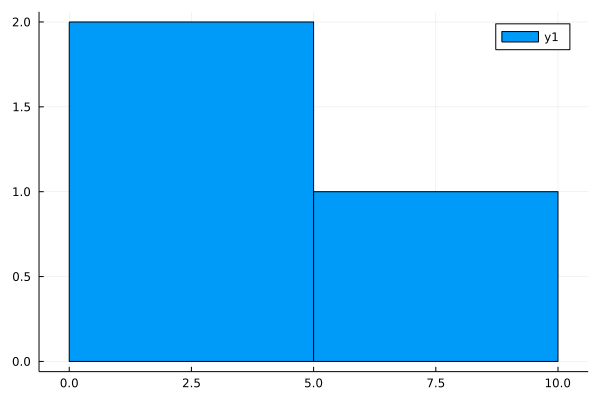

In [23]:
histogram(b)

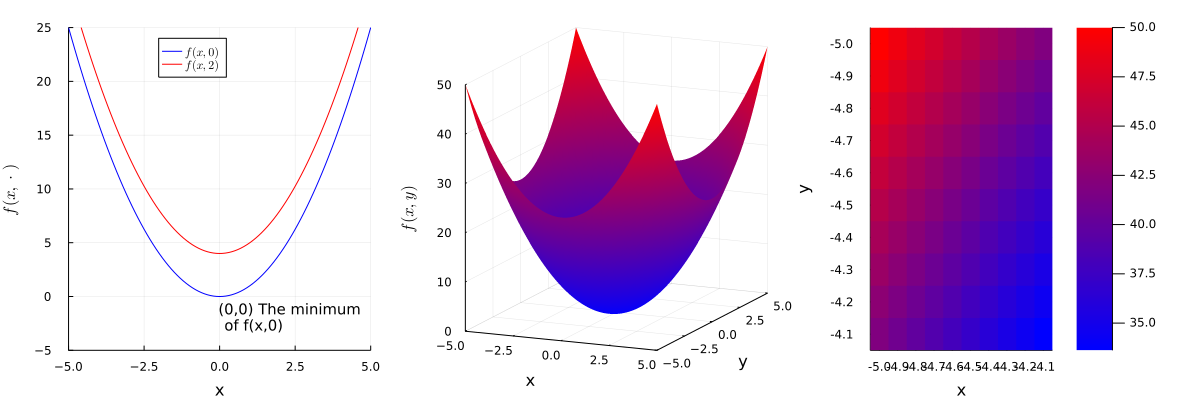

In [26]:
using Plots, LaTeXStrings, Measures; 

# pyplot()

f(x,y) = x^2 + y^2
f0(x) = f(x,0)
f2(x) = f(x,2)

xVals, yVals = -5:0.1:5 , -5:0.1:5
plot(xVals, [f0.(xVals), f2.(xVals)], 
    c=[:blue :red], xlims=(-5,5), legend=:top,
    ylims=(-5,25), ylabel=L"f(x,\cdot)", label=[L"f(x,0)" L"f(x,2)"])
p1 = annotate!(0, -0.2, text("(0,0) The minimum\n of f(x,0)", :left, :top, 10))

z = [ f(x,y) for y in yVals, x in xVals ]
p2 = surface(xVals, yVals, z, c=cgrad([:blue, :red]),legend=:none, 
    ylabel="y", zlabel=L"f(x,y)")

M = z[1:10,1:10]

p3 = heatmap(M, c=cgrad([:blue, :red]), yflip=true, ylabel="y",  
    xticks=([1:10;], xVals), yticks=([1:10;], yVals))

plot(p1, p2, p3, layout=(1,3), size=(1200,400), xlabel="x", margin=5mm)